In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("HousingData.csv")

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
110,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5,384,20.9,393.49,13.00,21.7
75,0.09512,0.0,12.83,0.0,0.437,6.286,45.0,4.5026,5,398,18.7,383.23,8.94,21.4
431,10.06230,0.0,18.10,0.0,0.584,6.833,94.3,2.0882,24,666,20.2,81.33,19.69,14.1
252,0.08221,22.0,5.86,0.0,0.431,6.957,6.8,8.9067,7,330,19.1,386.09,3.53,29.6
354,0.04301,80.0,1.91,0.0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [ ]:
df.shape

(506, 14)

In [ ]:
df.fillna(df.mean(), inplace = True)

In [ ]:
df.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [ ]:
df.shape

(506, 14)

<Axes: >

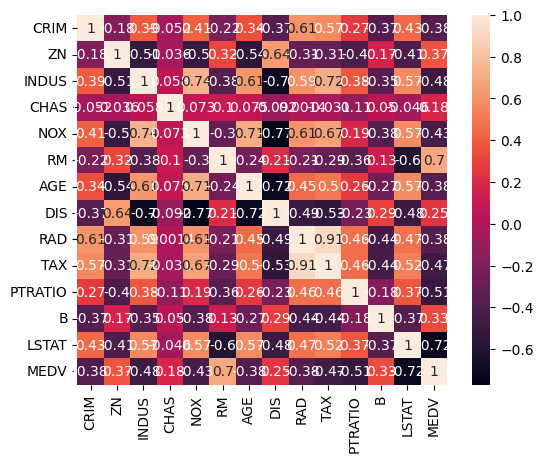

In [ ]:
sns.heatmap(df.corr(), annot = True, square = True)

In [ ]:
X = df.drop(['MEDV'], axis = 1)
y = df['MEDV']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train.shape, x_test.shape

((354, 13), (152, 13))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential ([
    Dense(128, activation = 'relu', input_shape = (13,)),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),

    Dense(1)
])

model.compile(optimizer = 'adam', loss = 'mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train, epochs = 150, batch_size = 32, validation_split = 0.03)

Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 563.7375 - mae: 22.1777 - val_loss: 571.2431 - val_mae: 22.0131
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 485.6072 - mae: 20.3192 - val_loss: 472.4029 - val_mae: 19.6949
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 366.0886 - mae: 17.2247 - val_loss: 292.1494 - val_mae: 14.5782
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 130.4138 - mae: 9.5155 - val_loss: 107.6279 - val_mae: 7.1589
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 75.0377 - mae: 6.7886 - val_loss: 82.6402 - val_mae: 5.7674
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 49.5139 - mae: 5.4472 - val_loss: 92.0721 - val_mae: 6.3233
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 43.1689 - mae: 4.6635 - val_loss: 80.8381 - val_mae: 5.6247
Epoch 8/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 22.6543 - mae: 3.4975 - val_loss: 74.2826 - val_mae: 5.3453
Epoch 9/150
11/11 ━━━━━━━━━━

In [ ]:
loss, mae = model.evaluate(x_test, y_test, verbose = 0)
print("Mean Squared Error", loss)
print("Mean Absolute Error", mae)

Mean Squared Error 20.150697708129883
Mean Absolute Error 2.82269549369812


In [ ]:
predictions = model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [ ]:
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE: ", rmse)

#Compute R² Score
r2 = r2_score(y_test, predictions)
print("R² Score", r2)

RMSE:  4.488953050656833
R² Score 0.7936086882344799


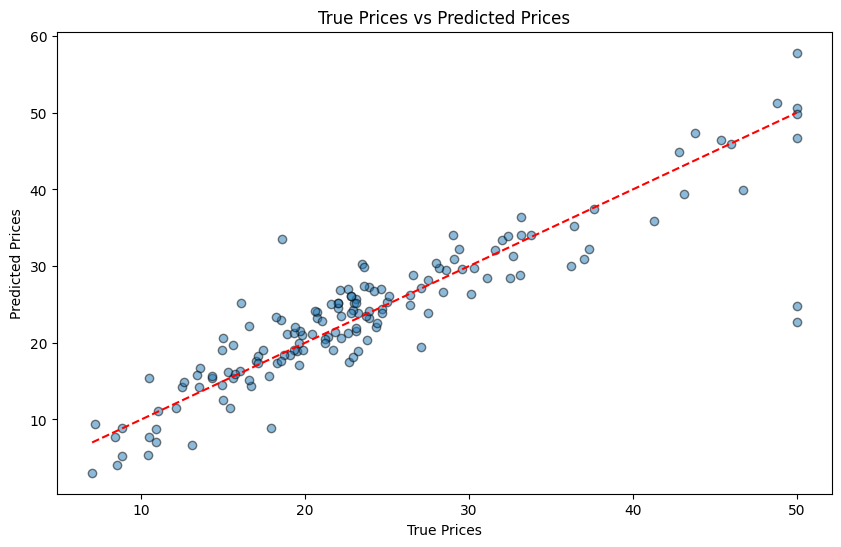

In [ ]:
plt.figure(figsize = (10, 6))
plt.scatter(y_test, predictions, alpha = 0.5, edgecolors = 'k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = "red", linestyle = "dashed")
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True Prices vs Predicted Prices")
plt.show()

In [ ]:
# Predictions

predicted_value = model.predict(x_test[0]. reshape(1, -1))
print(f"Prediction for X_test[{0}]: {predicted_value[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Prediction for X_test[0]: [26.564934]
